<a href="https://colab.research.google.com/github/SidRaghuveer15/FirstRep/blob/main/BL_EN_U4CSE20161_LabSession1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
from scipy import linalg as ln
from numpy.linalg import pinv
from numpy.linalg import matrix_rank
url = "https://raw.githubusercontent.com/SidRaghuveer15/FirstRep/main/Lab%20Session1%20Data.csv"
dataset1 = pd.read_csv(url)
dataset1.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280


In [72]:
#Please load the data and segregate them into 2 matrices A & C
A=dataset1.iloc[:, 1:4].values
C=dataset1.iloc[:,4].values
print(A)
print(C)

[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
[386 289 393 110 280 167 271 274 148 198]


In [73]:
#What is the dimensionality of the vector space for this data?
print(dataset1.shape)

#What is the rank of Matrix A?
matrix_rank(A)

(10, 5)


3

In [74]:
#Using Pseudo-Inverse find the cost of each product available for sale
A_inverse=pinv(A)
print(A_inverse)

[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [75]:
#Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products available with the vendor.
np.dot(A_inverse, C)

array([ 1., 55., 18.])

In [76]:
#Mark all customers(in “Purchase Data” table)with paymentsabove Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.
df = np.where(dataset1['Payment (Rs)']> 200, "Rich", "Poor") 
print(df)

['Rich' 'Rich' 'Rich' 'Poor' 'Rich' 'Poor' 'Rich' 'Rich' 'Poor' 'Poor']


In [77]:
#Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.
path = "/content/drive/MyDrive/5th SEMESTER INFORMATION/19CSE305 MACHINE LEARNING/AssignmentHW1/Lab Session1 Data.xlsx"
sheet_name = "IRCTC Stock Price"
IRC = pd.read_excel(path, sheet_name)
IRC

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [78]:
#Calculate the mean and variance of the Price data present in column D. 
print(IRC["Price"].mean())
IRC["Price"].var()

1560.6634538152612


58732.36535253918

In [79]:
#Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations.

import statistics
data1 = IRC.loc[IRC['Day'] == 'Wed']['Price']
data2 = data1.sample(frac = 0.1)    # Select 10% of values for Sample mean
print(f"Sample mean of the Price column on Wednesday is {statistics.mean(data2)}")
print(f"Population mean of the Price column on Wednesday is {statistics.mean(data1)}")

Sample mean of the Price column on Wednesday is 1504.68
Population mean of the Price column on Wednesday is 1550.706


In [80]:
#Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.

d1 = IRC.loc[IRC['Month'] == 'Apr']['Price']
d2 = d1.sample(frac = 0.1)    # Select 10% of values for Sample mean
print(f"Sample mean of the Price column on Wednesday is {statistics.mean(d2)}")
print(f"Population mean of the Price column on Wednesday is {statistics.mean(d1)}")

Sample mean of the Price column on Wednesday is 1625.85
Population mean of the Price column on Wednesday is 1698.9526315789474


In [81]:
#From the Chg% (available in column I) find the probability of making a loss over the stock. 

min_values = list(filter(lambda x: x <= 0, IRC['Chg%']))
plus_values = list(filter(lambda x: x > 0, IRC['Chg%']))
sum1 = len(plus_values)
sum2 = abs(len(min_values))
sum = sum1 + sum2
prob_loss = round((sum2/ sum)*100, 2) 
print(f"Probability of making a loss over the stock is: {prob_loss} %")

Probability of making a loss over the stock is: 50.2 %


In [82]:
#Calculate the probability of making a profit on Wednesday.

wed = IRC.loc[IRC['Day'] == 'Wed']['Chg%']
nv_wed = list(filter(lambda x: x <= 0, wed))
pv_wed = list(filter(lambda x: x > 0, wed))
pwed_sum = len(pv_wed)
nwed_sum = abs(len(nv_wed))
fullsum = pwed_sum  + nwed_sum
wed_profit = round((pwed_sum / fullsum)*100, 2) 
print(f"Probability of making a profit over the stock on Wednesday is: {wed_profit} %")

Probability of making a profit over the stock on Wednesday is: 42.0 %


In [83]:
#Calculate the conditional probability of making profit, given that today is Wednesday.

wed_Rec = IRC.loc[IRC['Day'] == 'Wed']
data_entries = wed_Rec.shape[0]
T_entries = IRC.shape[0]
wedprob= round((data_entries/T_entries)*100, 2)

print(f"Probability of a day being Wednesday is: {wedprob} %")
profit = 100 - prob_loss
print(f"Probability of making overall profit is: {profit} %")

cond_prob = round((profit*wedprob)/wedprob,2)
print(f"conditional probability of making profit, given that today is Wednesday is: {cond_prob } %")

Probability of a day being Wednesday is: 20.08 %
Probability of making overall profit is: 49.8 %
conditional probability of making profit, given that today is Wednesday is: 49.8 %


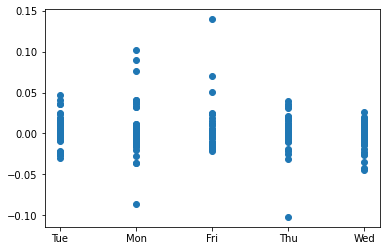

In [84]:
#Make a scatter plot of Chg% data against the day of the week

import matplotlib.pyplot as plt
# plt.scatter(IRC['Chg%'], IRC['Day'])
plt.scatter(IRC['Day'], IRC['Chg%'])
plt.show()